# Burgers Equation

## Non conservative form

Here we solve the Burgers equation $u_t + u \cdot u_x=0$ using as an initial condition the profile $u(x,t=0)= 10 \exp{[-(x-x_0)^2]}$ with $x_0=5$.

We use a domain $x\in [0,10]$ with periodic boundary conditions. We then try to change the resolution to see that no matter how precise we are, we always end up having a convergence to the wrong solution. 

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define the domain
L = 10.0     # Domain length
nx = 101    # Number of grid points
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

##print(x,'\n',dx) #just a check

# Define the time step and the final time
cf = 0.5

# choose the dt wisely: 

t_final = 0.5

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)


# Define the initial condition
x0=5
u_initial = 10 * np.exp(-(x-x0)**2)

# Initialize the solution array
u_current = u_initial.copy()

dt = np.min(cf*dx/u_initial)  

#we create arrays where we will store the time and the l2norm
l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time=[]
time.append(0.0)

nx= 101
dx= 0.1
dt= 0.005
Number of iterations= 100.0


## Solution of the equation: 

In [15]:
# Initialize time and iteration counter
t = 0.0
i = 0

#save the initial conditions
plt.plot(x, u_current)
plt.title('Time='+str(round(t,2)))

# add the array for the overall evolutions of the solutions over time: 

total_sol = []

#solve the advection equation
while t < t_final:
    
    total_sol.append(u_current)
    
    u_next = u_current - dt / dx * u_current * (u_current - np.roll(u_current, 1))    
    
    # Update the solution
    u_current = u_next.copy()
    
    
    #advance the time 
    t += dt
    i += 1
    
    #compute the l2 norm and add the time to the time vector
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)

<IPython.core.display.Javascript object>


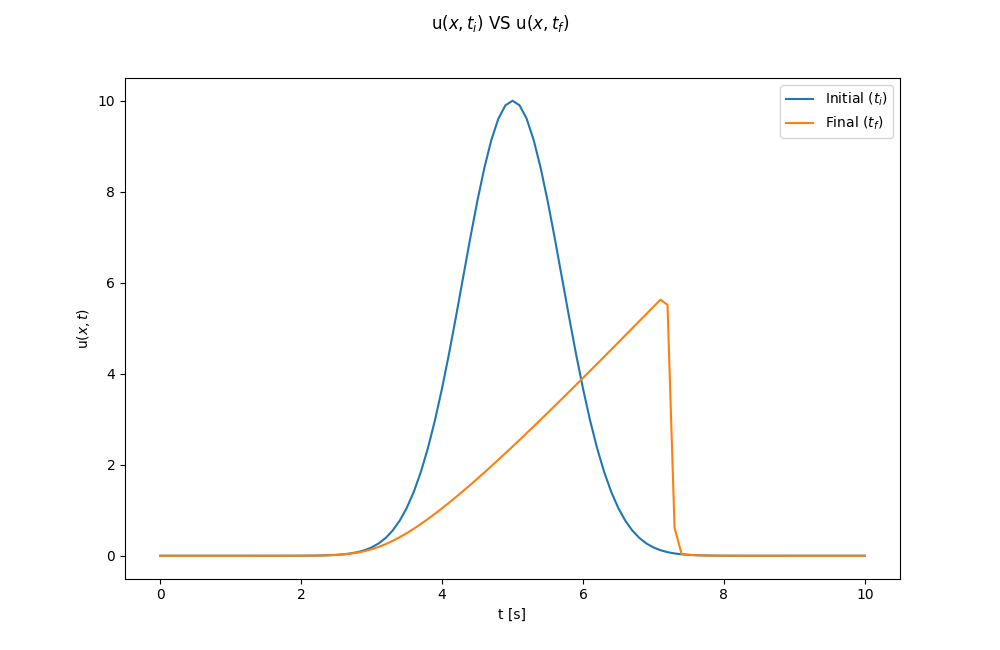

In [16]:
# Plot the final solution
plt.figure(figsize = (10, 6.5))
plt.plot(x, u_initial, label='Initial ($t_i$)')
plt.plot(x, u_current, label='Final ($t_f$)')
plt.legend()
plt.xlabel("t [s]")
plt.ylabel("$\mathrm{u}(x, t)$")
plt.suptitle("$\mathrm{u}(x, t_i)$ VS $\mathrm{u}(x, t_f)$")
plt.show()

See the values of the norm as time passes: 

<IPython.core.display.Javascript object>


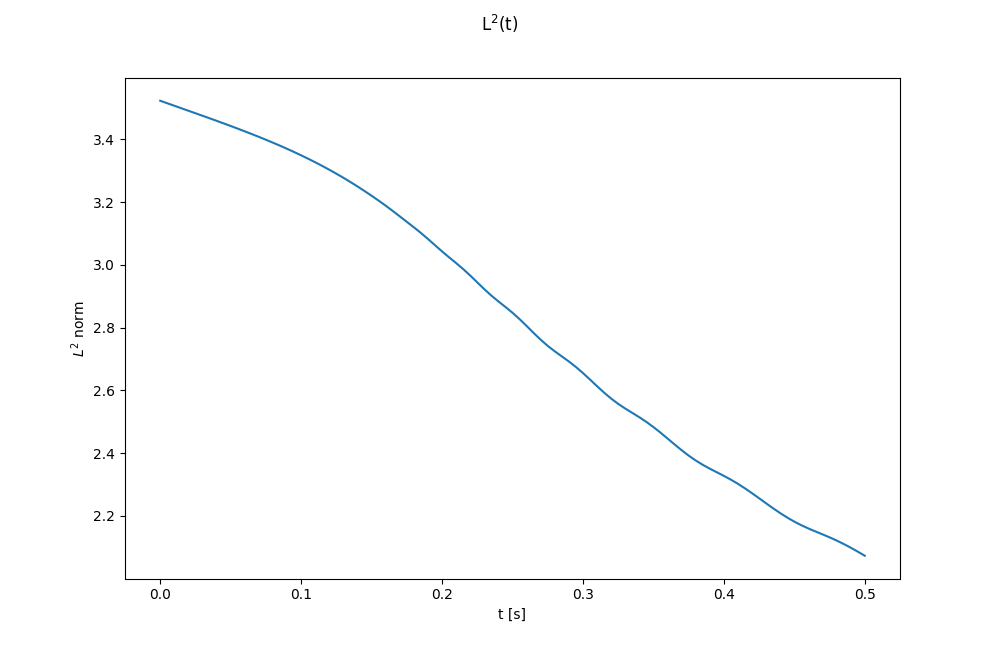

In [17]:
plt.figure(figsize = (10, 6.5))
plt.plot(time,l2norm)
plt.xlabel("t [s]")
plt.ylabel("$L^2$ norm")
plt.suptitle("$\mathrm{L^2(t)}$")
plt.show()

### FuncAnimation animations:

Here I just report an additional code I developed to see animation without having to save the images every time.

In [18]:
import matplotlib.animation as animation
import matplotlib
matplotlib.use("TkAgg")

/var/folders/x1/_4_0wf6n3vbb18gn1psjd98w0000gn/T/ipykernel_16147/2468860607.py:3: MatplotlibDeprecationWarning: The close_event function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use callbacks.process('close_event', CloseEvent(...)) instead.
  matplotlib.use("TkAgg")


<IPython.core.display.Javascript object>


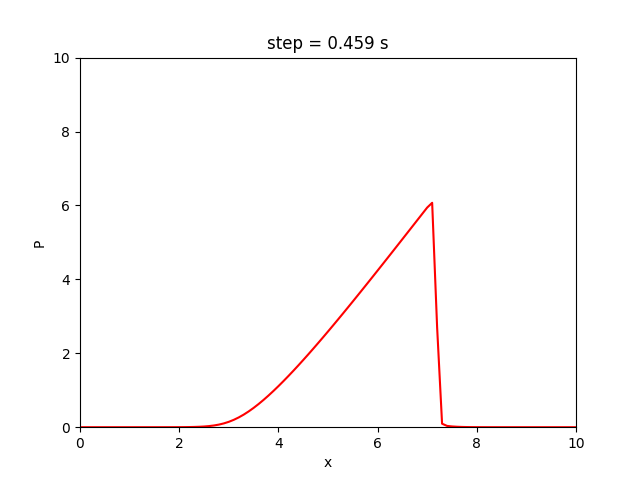

In [40]:
%matplotlib notebook

fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('P')
plotLine, = ax.plot(x, np.zeros(len(x))*np.NaN, 'r-')
plotTitle = ax.set_title("t=0")
ax.set_ylim(0,10.)
ax.set_xlim(0,10)


def solution(t):
    p = np.array(total_sol)[t]
    return p


def animate(t):
    pp = solution(t)
    plotLine.set_ydata(pp)
    plotTitle.set_text(f"step = {t/98 * 0.5:.3f} s")
    #ax.relim() # use if autoscale desired
    #ax.autoscale()
    return [plotLine,plotTitle]



ani = animation.FuncAnimation(fig, func=animate, frames=np.arange(0, len(total_sol), 2), blit=True)
ani.save('non_cons.gif')
plt.show()

## Conservative form: 

In [25]:
# Define the domain
L_cons = 10.0     # Domain length
nx_cons = 101    # Number of grid points
dx_cons = L/(nx-1)   # Grid spacing
x_cons = np.linspace(0, L, nx)

##print(x,'\n',dx) #just a check

# Define the time step and the final time
cf_cons = 0.5

t_final_cons = 0.5

print('nx=',nx_cons)
print('dx=',dx_cons)
print('dt=',dt_cons)
print('Number of iterations=',t_final_cons/dt_cons)


# Define the initial condition
x0_cons=5
u_initial_cons = 10 * np.exp(-(x_cons-x0_cons)**2)

# Initialize the solution array
u_current_cons = u_initial_cons.copy()

dt_cons = np.min(cf_cons*dx_cons/u_initial_cons) 

#we create arrays where we will store the time and the l2norm
l2norm_cons=[]
l2norm_cons.append(np.sqrt(np.sum(u_current_cons**2)/len(u_current_cons)))

time_cons=[]
time_cons.append(0.0)

nx= 101
dx= 0.1
dt= 0.005
Number of iterations= 100.0


### Solution of the equation: 

In [26]:
# Initialize time and iteration counter
t_cons = 0.0
i_cons = 0

plt.plot(x_cons, u_current_cons)
plt.title('Time='+str(round(t,2)))

# add the array for the overall evolutions of the solutions over time: 

total_sol_cons = []

#solve the advection equation
while t_cons < t_final_cons:
    
    total_sol_cons.append(u_current_cons)
    
    u_next_cons = u_current_cons - dt_cons / dx_cons * (1 / 2 * u_current_cons**2 - 1 / 2 * np.roll(u_current_cons, 1)**2)    
    
    # Update the solution
    u_current_cons = u_next_cons.copy()
    
    
    #advance the time 
    t_cons += dt_cons
    i_cons += 1
    
    #compute the l2 norm and add the time to the time vector
    l2norm_cons.append(np.sqrt(np.sum(u_current_cons**2)/len(u_current_cons)))
    time_cons.append(t_cons)

<IPython.core.display.Javascript object>


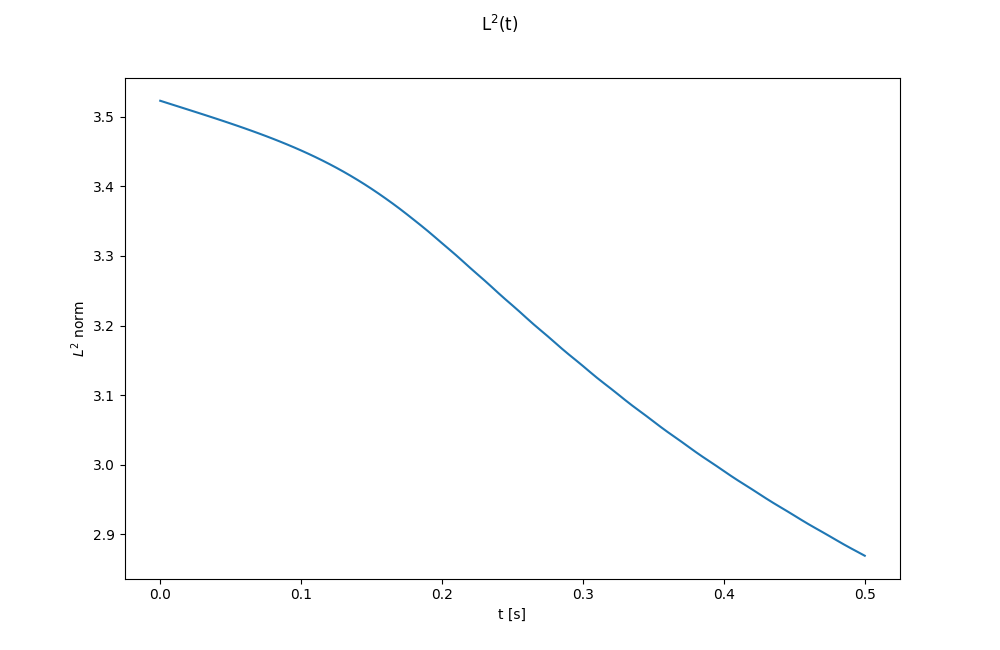

In [27]:
plt.figure(figsize = (10, 6.5))
plt.plot(time_cons,l2norm_cons)
plt.xlabel("t [s]")
plt.ylabel("$L^2$ norm")
plt.suptitle("$\mathrm{L^2(t)}$")
plt.show()

<IPython.core.display.Javascript object>


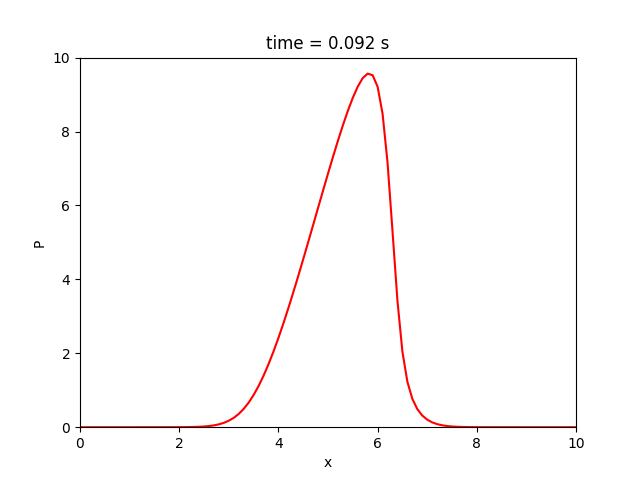

In [38]:
%matplotlib notebook

fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('P')
plotLine, = ax.plot(x_cons, np.zeros(len(x_cons))*np.NaN, 'r-')
plotTitle = ax.set_title("t=0")
ax.set_ylim(0,10.)
ax.set_xlim(0,10)


def solution(t):
    p = np.array(total_sol_cons)[t]
    return p


def animate(t):
    pp = solution(t)
    plotLine.set_ydata(pp)
    plotTitle.set_text(f"time = {t/98 * 0.5:.3f} s")
    #ax.relim() # use if autoscale desired
    #ax.autoscale()
    return [plotLine,plotTitle]



ani = animation.FuncAnimation(fig, func=animate, frames=np.arange(0, len(total_sol_cons), 2), blit=True)
ani.save('flux_cons_form.gif')
plt.show()

In [35]:
np.arange(0, len(total_sol_cons), 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])